# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 3**

## Continuing on Statistics and python:





### In the following exercise, we are going to make some **assumption about data**, **make a model**, and **fit the parameters of the model**:

# **Flip A Coin: Is this Coin Really Fair?**

## Imagine that you want to measure the fairness of a given coin:
### You run the following experiment:
1. You count the number of heads per $N=20$ coin toss.
2. You do the previous line 100 times.

And this is the outcome of the experiment:

In [57]:
data_array = [ 6,  7,  8, 11,  8,  7,  8,  9,  8,  5, 12,  7,  5,  8,  8,  8, 10,
               9,  9,  7,  5, 11,  6,  2,  9,  8, 11,  8, 10,  5,  9, 11,  8,  9,
               7,  8,  6,  8, 12,  9, 11,  9,  6,  7, 11,  5,  9,  6,  8, 12,  6,
               8,  7,  8,  8, 11,  5,  6,  6,  7, 12,  9,  7,  8,  9,  7, 11,  7,
               9,  4,  8,  9,  9,  9, 12,  6,  8,  7, 10,  6,  5,  8,  9,  7,  8,
               7,  9,  7,  7, 12,  9, 11,  6,  5,  9,  7,  9,  7, 11,  8]

First, we need to come up with a model for the data. We need to find the probability of each outcome first, before getting into the estimation for fairness. Let's ask a simple question: **What are the possible results of a coin toss?** 

_The answer is:_ (Head, tail) or (0,1) or (True, False) or (win, lose)

So, if we assume that the probability of getting 1 is $p$ and $p$ is not going to change throughout the experiment. Also, by definition, the probability of getting 0 is $q=1-p$. ($p$ is a quantity we are looking for since it is a measure for the fairness of the coin)

Let's say that we are going to toss the coins $N$ times and we get $n$ desired outcome. (e.g., **Head** is the desired outcome)


But, what are the chances of getting $n$ out of $N$ coin tosses? 

$n$ desired outcome probability is $p^n$; also we have $N-n$ undesired outcome during the experiment which means that the total probability of getting $n$ 1s and $N-n$ 0s is $p^n q^{N-n}$

Also, we do not care about the **order** of the coin toss. (e.g. (1,0,0,0,1), (0,1,1,0,0), (1,1, 0, 0, 0) all are considered same outcome)
So, we need to multiply the previous probability by number of configurations. (Number of ways you can choose $n$ ones, and $N-n$ zeros; which is:  $\binom {N}{n}$

So the probability of the $n$ heads out of $N$ coin toss, when the probability of single **head** is $p$, is the following: 

\begin{equation}
p(n|N,p)=\binom {N}{n} p^n (1-p)^{N-n} 
\end{equation}

Which is called the [**binomial distribution**](https://en.wikipedia.org/wiki/Binomial_distribution).

There is a pre-defined [binomial function in scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) package. However, since we are still trying to get familiar with python, let's write the function ourself as below:


In [58]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [59]:
def binomial(n=0, N=1, p=1):
    """
    This is the probability mass function for the binomial distribution.
    
    INPUT:
            n: Number of desired outcome
            N: Number of trials
            p: Probability of a desired outcome for each separate coin toss
            
    OUTPUT:
            Probability of getting n desired outcome, out of N trials, 
            when the probality of desired outcome is p 
    """
    from math import factorial
    factor = factorial(N)/(factorial(n)*factorial(N-n))
    return factor*(p**n)*(1-p)**(N-n)

### Now we need to make some assumption about prior distribution of $p$ which is the quantity of the interest.

Since we have no other information about the coin before-hand we can assume a **Uniform** prior for $p$. So, let's sample from $10^5$ values for $p$ from this uniform distribution.

In [61]:
number_of_points = 10**5
prior_p = np.linspace(0,1, number_of_points)

Importing time() for getting a benchmark for different methods:

In [62]:
from time import time

### **A simple for loop:**

In the following cell, we are going to calculate the probability of getting all the values in the data-set, while using different $p$. Since, we can assume that the experiments are independent, we can simply multiply all the probabilities. Then looking for the $p$ value which maximize that probability; or in other words, is the most likely value for $p$ given our data-set. 

You should notice that we are using the **Bayes' law** again; we are looking for $P(p|X)$ in which $X$ is the whole data-set. But, we can turn that around and look for much simpler quantity, using Bayes' law: $P(p|X) \sim P(X|p)$

In [63]:
N = 20

prob_p_cat=np.zeros(number_of_points)

ti=time()
for i,p in enumerate(prior_p):
    prob=1
    for data in data_array:
        prob *= binomial(data, N, p)
    prob_p_cat[i] = prob
tf=time()-ti

print("For loop method for {} data points and {} simulations \
(sampling p) takes: {:10.3f} seconds ".format(len(data_array), \
                                              number_of_points, tf))

For loop method for 100 data points and 100000 simulations (sampling p) takes:     28.178 seconds 


In [64]:
s ="(sampling p) takes: {:10.3f} seconds  .format(len(data_array), number_of_points, tf))"

In [65]:
len(s)

85

This is the most likely value according to the description above.

In [66]:
prior_p[prob_p_cat==max(prob_p_cat)]

array([0.40300403])

### **Using numpy.vectorize:**

In this method instead of using a for loop on the elements of the data set we can use the numpy.vectorize(binomial), which allows us to give the vectorized function the whole array of data.

In [67]:
vec_binomial = np.vectorize(binomial)

In [68]:
N = 20

prob_p_cat=np.zeros(number_of_points)

ti=time()
for i,p in enumerate(prior_p):
    prob_p_cat[i] = np.prod(vec_binomial(data_array, N, p))
tf=time()-ti

    
print("numpy.vectorize method for {} data points and {} simulations \
(sampling p) takes: {:10.3f} seconds ".format(len(data_array), number_of_points, tf))

numpy.vectorize method for 100 data points and 100000 simulations (sampling p) takes:     19.915 seconds 


In [69]:
prior_p[prob_p_cat==max(prob_p_cat)]

array([0.40300403])

You can see that the numpy.vectorize method is a little bit **faster** than the simple for loop. 

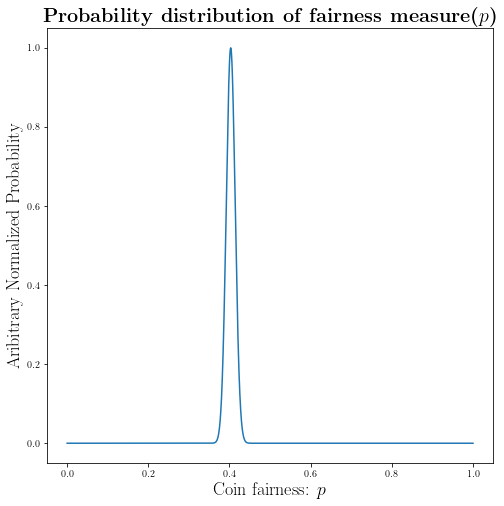

In [70]:
fig_p = plt.figure(figsize=(8,8))

# Just normalizing the probability to maximum value so most likely
# value corresponds to 1.
# For getting the through probability we need to find the Integral 
# of the un-normalized distribution.

plt.plot(prior_p, prob_p_cat/max(prob_p_cat),  markersize=1)

plt.title(r"\textbf{Probability distribution of fairness measure($p$)}", fontsize=20)

plt.xlabel(r"Coin fairness: $p$", fontsize=18)
plt.ylabel(r"Aribitrary Normalized Probability", fontsize=18)


plt.show()

As you can see from our experiment we found the distribution of the interest: $P(p|X)$

### _**Result:**_

The **most likely value** for the fairness of the coin is $0.403$, which shows that our coin is **biased** toward getting **tail**.



# Another Coin Toss Experiment:

Let's try to find the fairness of the coin when we already know the **true** value of the fairness to be $p=0.3$ and we increase the number of data.

In [71]:
import numpy as np
from scipy.integrate import trapz

In [72]:
np.random.seed(13210)
def create_data_points(n, p=0.3):
    return np.random.binomial(n, p)

In [73]:
Number_of_data_points = [1, 2, 5, 10, 20, 50, 100, 1000]
heads = [create_data_points(i) for i in Number_of_data_points]

In [74]:
prior_p = np.ones(10000)

In [75]:
def posterior(Heads, Trials, prior):
    post = []
    for i, p in enumerate(np.linspace(0, 1, len(prior))):
        likelihood = binomial(n=Heads, N=Trials, p=p)
        post.append(likelihood * prior[i])
    ppp = np.linspace(0, 1, len(prior))

    return np.array(post)/trapz(np.array(post), ppp)

In [76]:
post_ = [posterior(heads[0], Number_of_data_points[0], prior_p)]
for i in range(1, len(Number_of_data_points)):
    post_ += [posterior(heads[i], Number_of_data_points[i], post_[i - 1])]
    

In [77]:
ppp = np.linspace(0, 1, len(prior_p))

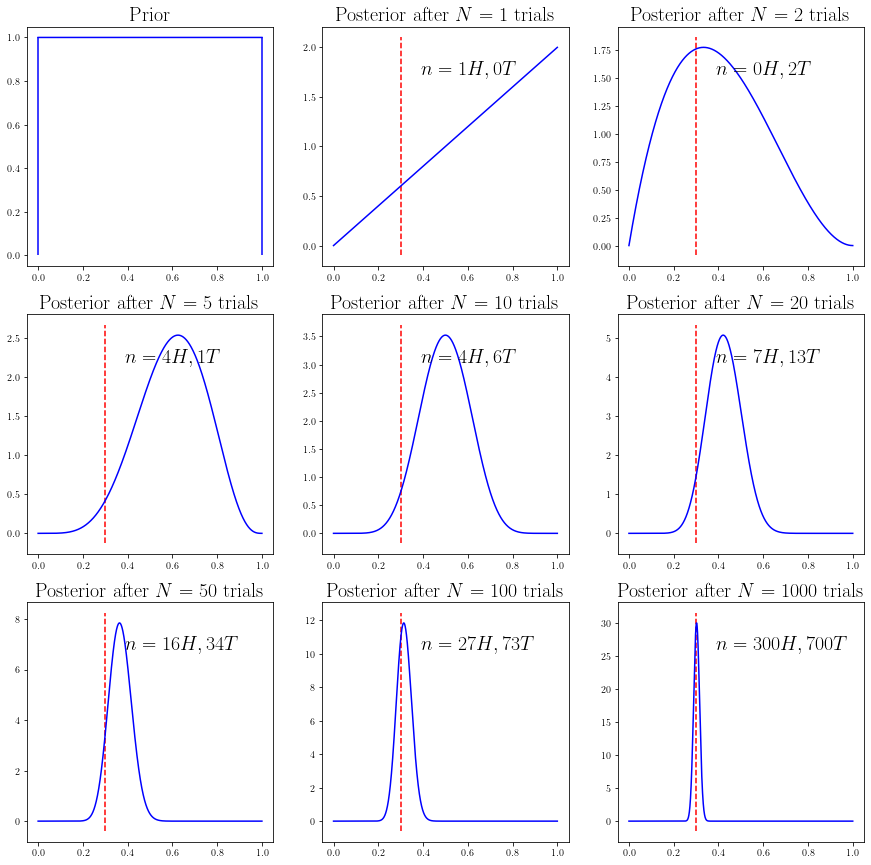

In [78]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(3, 3, 1)
ax.plot(ppp, prior_p, color="b")
ax.set_title(r"Prior", fontsize=20)
ax.vlines(0, 0, 1, color="b")
ax.vlines(1, 0, 1, color="b")

for i, post in enumerate(post_):
    ax = fig.add_subplot(3, 3, i + 2)
    ax.plot(ppp, post, color="b")
    ax.set_title(r"Posterior after $N={}$ trials".format(Number_of_data_points[i]), fontsize=20)
    ax.text(0.4, 0.8, "$n = {}H, {}T$".format(heads[i], Number_of_data_points[i] - heads[i]), fontsize=20, transform=ax.transAxes)
    ax.vlines(0.3, *ax.get_ylim(), color="r", linestyle="dashed")
    
# plt.savefig("posterior_1.png", dpi=250, bbox_inches="tight")
plt.show()

<ipython-input-245-1ff929aafd8d>:3: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(prior_p, np.ones_like(prior_p)/trapz(np.ones_like(prior_p), prior_p), label=r"Prior")


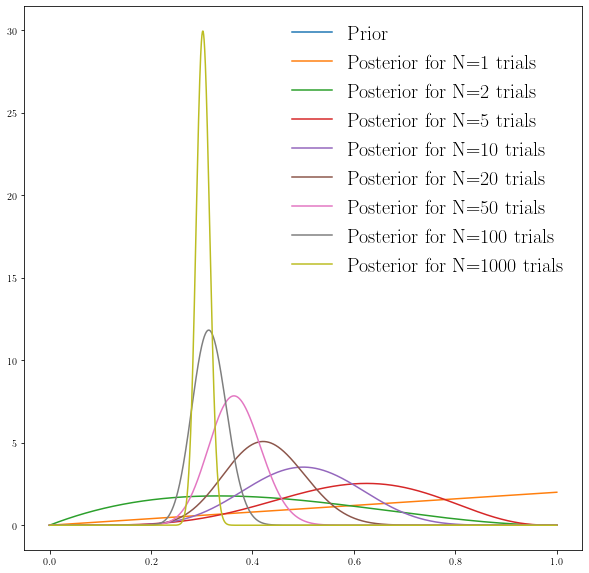

In [245]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(prior_p, np.ones_like(prior_p)/trapz(np.ones_like(prior_p), prior_p), label=r"Prior")

for i, post in enumerate(post_):
    ax.plot(ppp, post, label=r"Posterior for N={} trials".format(Number_of_data_points[i]))

ax.legend(fontsize=20, frameon=False)
plt.savefig("posterior_2.png", dpi=250, bbox_inches="tight")

plt.show()

# **What is the numerical value of $\pi$?**

## There is a simple geometric approach we can use:


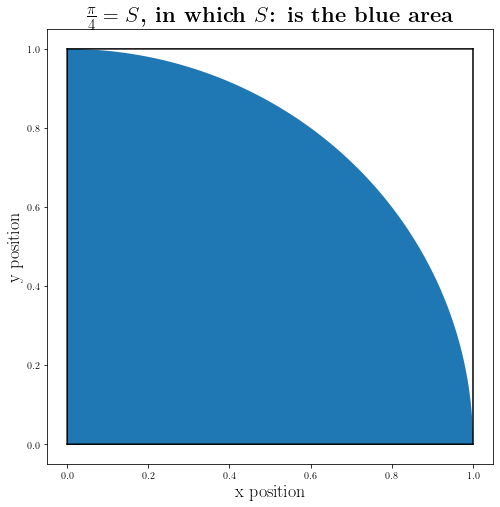

In [79]:
fig_pi = plt.figure(figsize=(8,8))


from matplotlib.patches import Rectangle
_number_of_points_=10**6

x = np.linspace(0,1, _number_of_points_)
y = np.sqrt(1-x**2)
# Plot the circle
plt.fill_between(x,y)

# There are more sophisticated ways to do this as well!
# Making the square
y1 = np.ones(10**6)
y2 = np.zeros(10**6)

# make the square plot
plt.plot(x, y1, "k")
plt.plot(x, y2, "k")
plt.plot(y2, x, "k")
plt.plot(y1, x, "k")


plt.title(r"\textbf{$\frac{\pi}{4}=S$, in which $S$: is the blue area}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)


plt.show()

So if we somehow manage to find the blue area we can find the numerical value for $\pi$. 

\begin{align*}
& S = \frac{\pi R^2}{4} = \frac{\pi}{4} \quad \textrm{Since we know $R=1$} \\
& \pi = 4S \quad \textrm{So we need S}
\end{align*}

### How can we find the area numerically?

First we need to get familiar with the [**Monte Carlo Simulations**](https://en.wikipedia.org/wiki/Monte_Carlo_method)

The **Monte Carlo** simulations, is a statistical technique to model stochastic (or probabilistic) systems and to find the probability of different outcome. 

Further references:
[http://mathworld.wolfram.com/MonteCarloMethod.html](http://mathworld.wolfram.com/MonteCarloMethod.html)

### First let's start with making $N$ random $(x,y)$ points from $[0,1]$ range:

In [80]:
N = 10e4
N = int(N)

x = np.random.random(N)
y = np.random.random(N)

Now we calculate the distance of each point from $(0,0)$: distance function --> d((x,y), (0,0))

In [81]:
distance_from_0_0 = np.sqrt(x**2 + y**2)

Let's count number of points with $d((x,y), (0,0)) \leq 1$

In [82]:
circle_points = distance_from_0_0[distance_from_0_0<=1]

Now we have an array of distances for points inside the circle ($d((x,y), (0,0)) \leq 1$):

If we define $n$ to be the number of points within circle, and $N$ to be total number of points,
We can find the area to be: 

\begin{equation*}
S = \frac{n}{N}
\end{equation*}

In [83]:
PI = 4 * len(circle_points)/len(distance_from_0_0)

print(PI)

3.14488


As you can see we are getting close to the **True value**.

Let's put the above procedures inside a function: 

In [84]:
def our_PI_generator(N=10e5):
    """This is our generic code for approximating pi ~ 3.14 with Monte Carlo simulation"""
    import numpy as np
    # initializing
    N = int(N)
    # Produce random numbers between [0,1] for (x,y)
    x = np.random.random(N)
    y = np.random.random(N)
    # Find the distance of (x,y) from [0,0]
    distance_from_0_0 = np.sqrt(x**2 + y**2)
    # imposing the condition for the circle:  distance((x,y),(0,0))<= 0 
    circle_points = distance_from_0_0[distance_from_0_0<=1]
    return 4 * len(circle_points)/N
    
    

In [85]:
our_PI_generator(10e7)

3.14122784

Let's use different number of points to see how adding to the number of points changes our numerical estimate for $\pi$:

In [86]:
np.logspace(2, 6, 10)

array([1.00000000e+02, 2.78255940e+02, 7.74263683e+02, 2.15443469e+03,
       5.99484250e+03, 1.66810054e+04, 4.64158883e+04, 1.29154967e+05,
       3.59381366e+05, 1.00000000e+06])

In [87]:
I =  np.logspace(2, 6, 5000)
I = np.array([int(i) for i in I])

_x_ = [our_PI_generator(i) for i in I]

Here we assume the true value of $\pi$ is coming from `numpy.pi`. Let's find the errors of our estimates:

In [88]:
distance_from_pi = np.array(_x_)-np.pi

This is how our estimate errors change with different number of points.

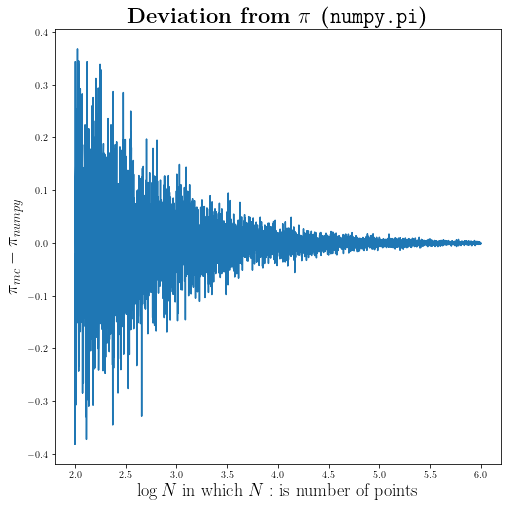

In [89]:
fig2 = plt.figure(figsize=(8,8))
plt.plot(np.log10(I), distance_from_pi)

plt.title(r"\textbf{Deviation from $\pi$ (\texttt{numpy.pi})}", fontsize=22)
plt.xlabel(r"$\log{N}$ in which $N: $ is number of points", fontsize=18)
plt.ylabel(r"$\pi_{mc}-\pi_{numpy}$", fontsize=18)

plt.show()

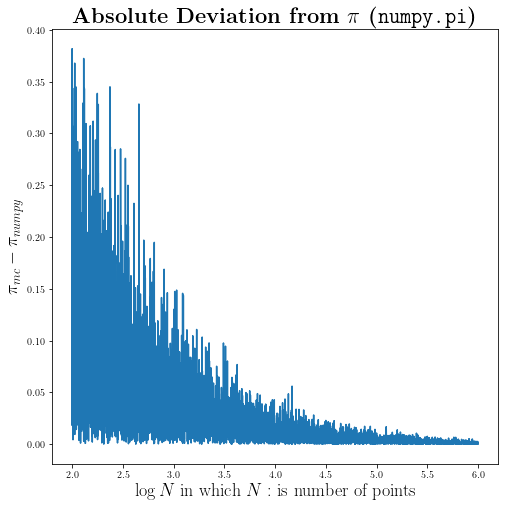

In [90]:
fig2 = plt.figure(figsize=(8,8))
plt.plot(np.log10(I), abs(distance_from_pi))

plt.title(r"\textbf{Absolute Deviation from $\pi$ (\texttt{numpy.pi})}", fontsize=22)
plt.xlabel(r"$\log{N}$ in which $N: $ is number of points", fontsize=18)
plt.ylabel(r"$\pi_{mc}-\pi_{numpy}$", fontsize=18)

plt.show()

### And as you would expect we are getting better and better by adding more points

Let's put the selection criteria of the circle inside a function. (This can be generalize easily to any arbitrary geometric criteria)

In [91]:
def impose_circle(distances, radius=1):
    """
    This is the function that takes an array `[distances]` 
    and a number (radius) and output an array of the similar
    size, and for those value<radius, assigns 1 and the rest 0
    """
    try:
        lenght_of_array = len(distances)
    except TypeError:
        lenght_of_array = 1
        
    selector=np.zeros(lenght_of_array)
    for i in range(lenght_of_array):
        if distances[i]<=radius:
            selector[i] = 1
    return selector

Now let's divide our points into two dictionaries: `inside_points` and `outside_points` 

In [92]:
selector = impose_circle(distance_from_0_0)

inside_points, outside_points = {}, {}

inside_points["x"] = x[selector==1]
inside_points["y"] = y[selector==1]

outside_points["x"] = x[selector==0]
outside_points["y"] = y[selector==0]

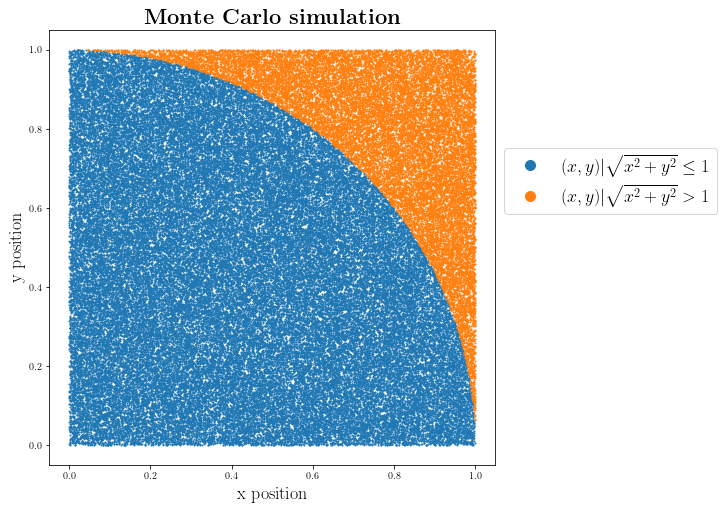

In [26]:
fig = plt.figure(figsize=(8,8))

plt.plot(inside_points["x"], inside_points["y"], '.', markersize=2, 
         label=r"$(x,y) | \sqrt{x^2+y^2} \leq 1 $")
plt.plot(outside_points["x"], outside_points["y"], '.', markersize=2, label=r"$(x,y) | \sqrt{x^2+y^2} > 1 $")

plt.title(r"\textbf{Monte Carlo simulation}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(bbox_to_anchor=(1, 0.75), fontsize=18, markerscale=10)


plt.show()

### This is how our Monte Carlo simulation actually look like!

### Finding the area using **Monte Carlo** simulation:

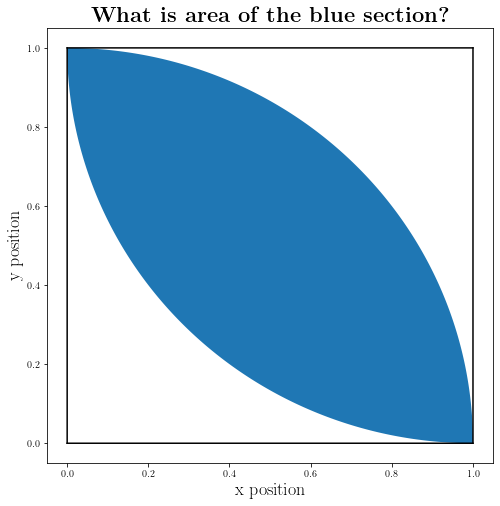

In [93]:
fig_pi = plt.figure(figsize=(8,8))


from matplotlib.patches import Rectangle
_number_of_points_=10**6

x = np.linspace(0,1, _number_of_points_)
# defing our curves (circle R^2 = X^2 + Y^2)
y = np.sqrt(1-x**2)
_y_ = 1 - np.sqrt(1-(x-1)**2)
# Fill the area between two circles
plt.fill_between(x,y,_y_)

# Making the square
y1 = np.ones(10**6)
y2 = np.zeros(10**6)

# make the square plot
plt.plot(x, y1, "k")
plt.plot(x, y2, "k")
plt.plot(y2, x, "k")
plt.plot(y1, x, "k")


plt.title(r"\textbf{What is area of the blue section?}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)


plt.show()

Let's do some **Monte Carlo** simulation again:

In [28]:
N = 10e4
N = int(N)

# Points from (0,0)
x = np.random.random(N)
y = np.random.random(N)

dis=np.sqrt(x**2+y**2)

# Points frome (1,1)
x_1= np.ones(N)-x
y_1= np.ones(N)-y

dis1=np.sqrt(x_1**2+y_1**2)

Now that we have our points let's apply the criteria:

In [29]:
selector=impose_circle(dis)
selector1=impose_circle(dis1)

In [30]:
final_sel = selector1*selector

In [31]:
_inside_points, _outside_points = {}, {}

_inside_points["x"] = x[final_sel==1]
_inside_points["y"] = y[final_sel==1]

_outside_points["x"] = x[final_sel==0]
_outside_points["y"] = y[final_sel==0]

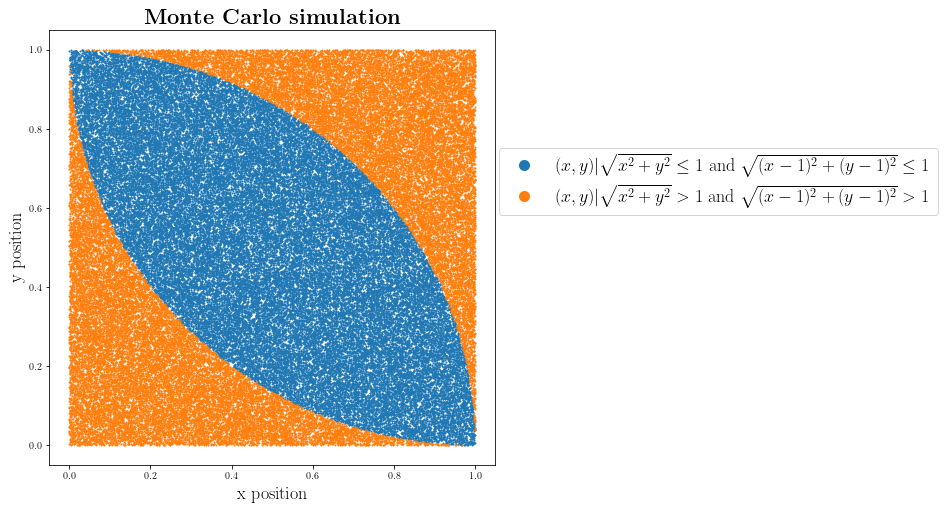

In [32]:
fig = plt.figure(figsize=(8,8))

plt.plot(_inside_points["x"], _inside_points["y"], '.', markersize=2, \
         label=r"$(x,y) | \sqrt{x^2+y^2} \leq 1$ and $\sqrt{(x-1)^2+(y-1)^2} \leq 1$")
plt.plot(_outside_points["x"], _outside_points["y"], '.', markersize=2, \
         label=r"$(x,y) | \sqrt{x^2+y^2} > 1 $ or $\sqrt{(x-1)^2+(y-1)^2} > 1$")

plt.title(r"\textbf{Monte Carlo simulation}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.75), fontsize=18, markerscale=10)


plt.show()

In [33]:
area_of_middle = len(_inside_points["x"])/len(x)
area_of_middle

0.5708

### Finding the Area geometrically:

Let's find the area for the part of square that we took fourth of a circle ($A_{extra}$) from and take two of them from the area of a square.

$A_{extra} = A_{square}-\frac{A_{circle}}{4}$

The area that we are looking for becomes:

$A_{shape} = A_{square} - 2 A_{extra}$

Let's plug in known quantities:
$A_{shape} = R^2 - 2(R^2 - \frac{\pi R^2}{4})$

\begin{equation*}
A_{shape} = R^2 (\frac{\pi}{2}-1)
\end{equation*}

for special case of $R=1$ it becomes:

\begin{equation*}
A_{shape} =\frac{\pi}{2}-1
\end{equation*}

Coding directly to find the area: (above calculation is inside the code)

In [34]:
area_curve = 1 - np.pi/4
two_curved_area = 2*area_curve

area_of_middle_geometry = 1 - two_curved_area
area_of_middle_geometry

0.5707963267948966

Using the formula directly:

In [35]:
np.pi/2-1

0.5707963267948966

### And as you would expect all of these methods are giving us consistent results.

# Random Walk: As a simple example of modeling a random process

## We are going to make a random walk and try to answer basic questions like what is the expected distance from the starting point, path, ...

There are a few ways of approaching this problem:
1. **Functional approach**: Building the whole process as a pipeline of different functions, which is the approach we used so far.
2. **Object-oriented approach**: Which is conceptually a very different approach but by doing this exercise we'll learn why this approach can be beneficial for some problems.

_**Tip:**_ Deciding what approach to take for a particular problem, depends on many factors. One of the most straightforward factors which are mainly independent of the problem is that whether you are going to reuse your codes again or adding different features to it later. If that's the case, generally speaking, it is better to try to think about the problem and implement your code with the object-oriented approach.  


### Like always let's start with the simplest case: 1-d random walk

In [94]:
def random_walk_1d(n, step=1):
    """This is a function for making a 1-d random walk
    INPUT:
          n (int): number of steps to take
          step (float): lenght of each steps
    
    OUTPUT:
          positions (numpy.array): an array of different positions during 
        the random walk
         
    """
    import random
    import numpy as np
    # making an array for putting all the information
    positions=np.zeros(n)
    
    # initial position
    x = positions[0]
    
    for i in range(1,n):
        # choosing the random step to take
        dx = random.choice([1,-1])*step
        x+=dx
        positions[i]=x
    return positions

### Let's use our code above for finding a min(max) of a given function:

In [95]:
def f(x):
    return x**2+2*x

We can find the minimum:

$\frac{df(x)}{dx}=2x+2$

Which has the solution of $x=-1$

In [97]:
def min_finder(_f, xi=0, step=0.01, n=100):
    import random
    import numpy as np
    
    positions=np.zeros(n)
    x = xi
    for i in range(1,n):
        stay = 1
        while stay==1:
            dx = random.choice([1,-1])*step
            x_dummy=x+dx
            if _f(x_dummy) <= _f(x):
                positions[i]=x_dummy
                x = x_dummy
                stay = 0
    return positions

We got the same results with our greedy random walk algorithm:

In [35]:
min_finder(f, n=100)[-1]

-0.9900000000000007

### Now let's go to 2-d case: 2-d random walk



In [98]:
def random_walk_2d(n):
    """2-d random walk function
    INPUT:
         n (int): number of steps to take
    
    OUTPUT:
         positions_dic (dic): A dictionary which contains am array of x and y values and 
         the keys are "x" and "y"
    """
    x,y = 0, 0
    import random
    positions_dic={}
    positions_dic["x"]=np.zeros(n)
    positions_dic["y"]=np.zeros(n)
    for i in range(1, n):
        (dx, dy) = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
        x,y=x+dx,y+dy
        positions_dic["x"][i]=x
        positions_dic["y"][i]=y
    return positions_dic


In [99]:
N = 10000

positions_walker_0=random_walk_2d(N)
positions_walker_1=random_walk_2d(N)

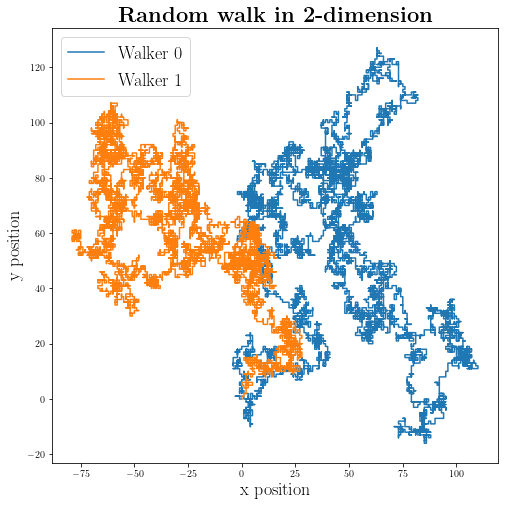

In [100]:
fig_2d_rw = plt.figure(figsize=(8,8))

plt.plot(positions_walker_0["x"], positions_walker_0["y"], label="Walker 0")
plt.plot(positions_walker_1["x"], positions_walker_1["y"], label="Walker 1")

plt.title(r"\textbf{Random walk in 2-dimension}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(fontsize=18, markerscale=10)


plt.show()


Now that we have our random walk function we can run a simulation of $N$ step random walk and record the distances from origin:

In [43]:
Number_of_simulations = 2000
distance=np.zeros(Number_of_simulations)

Number_of_walks_in_each_simulation = 10000

for i in range(Number_of_simulations):
    positions=random_walk_2d(Number_of_walks_in_each_simulation)
    distance[i]=np.sqrt(positions["x"][-1]**2+positions["y"][-1]**2)
    

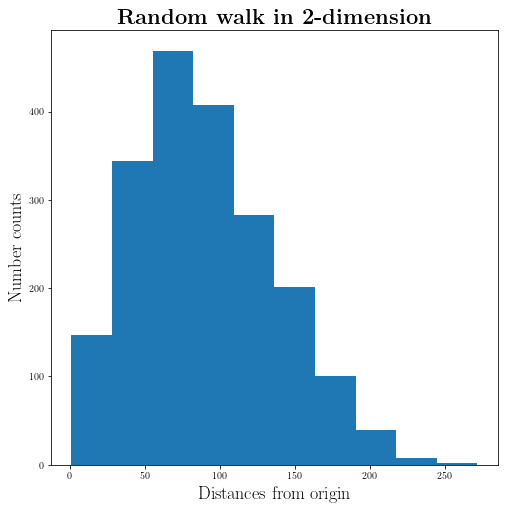

In [44]:
hist_rw = plt.figure(figsize=(8,8))

plt.hist(distance)

plt.title(r"\textbf{Random walk in 2-dimension}", fontsize=22)

plt.xlabel(r"Distances from origin", fontsize=18)
plt.ylabel(r"Number counts", fontsize=18)


plt.show()


In [45]:
np.sqrt(Number_of_walks_in_each_simulation)

100.0

The $\sqrt{N}$, which $N$ is the number of steps, is very close to the most likely value.
Here we are writing a function to simulate $N$ simulations with $n$ steps:

In [39]:
def Simulate_walks(number_of_steps, number_of_simulations):
    simulation={}
    for i in range(number_of_simulations):
        simulation[i]=random_walk_2d(number_of_steps)
    return simulation

### Now let's make a random walker which can move along differnt angles. 

In [101]:
def random_walk_2d_degree_free(n):
    x,y = 0, 0
    degree=0
    
    import random
    import numpy as np
    
    positions_dic={}
    positions_dic["x"]=np.zeros(n)
    positions_dic["y"]=np.zeros(n)
    
    for i in range(1, n):
        # Choose a degree in radian between [0, 2*pi] with 100000 choices for angles
        degree = random.choice(np.linspace(0, 2*np.pi, 100000))
        (dx, dy) = (np.cos(degree), np.sin(degree))
        x,y=x+dx,y+dy
        positions_dic["x"][i]=x
        positions_dic["y"][i]=y
    return positions_dic


In [102]:
positions_walker_deg_0 = random_walk_2d_degree_free(10000)

positions_walker_deg_1 = random_walk_2d_degree_free(10000)

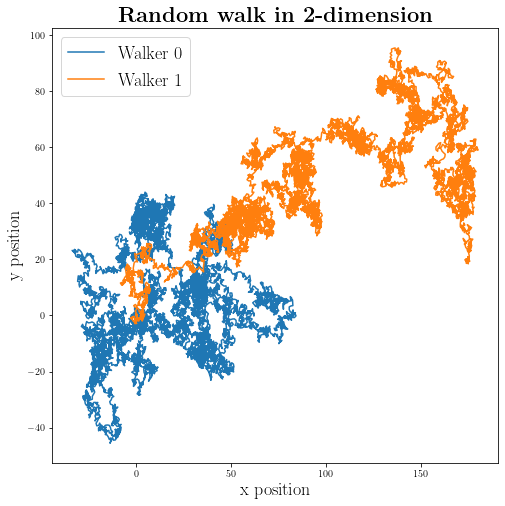

In [103]:
fig_2d__deg_rw = plt.figure(figsize=(8,8))

plt.plot(positions_walker_deg_0["x"], positions_walker_deg_0["y"], label="Walker 0")
plt.plot(positions_walker_deg_1["x"], positions_walker_deg_1["y"], label="Walker 1")

plt.title(r"\textbf{Random walk in 2-dimension}", fontsize=22)

plt.xlabel(r"x position", fontsize=18)
plt.ylabel(r"y position", fontsize=18)

plt.legend(fontsize=18, markerscale=10)


plt.show()


# Let's implement the random walk in an object-oriented method:

### First, we need to define a few classes:
First one is the position class which act as our position tracker and have few methods: `move`, `findX`, `findY`, and `distance`

In [104]:
class position(object):
    def __init__(self, x, y):
        """x,y are float type"""
        # assigning the initial position 
        self.x = x
        self.y = y
    
    def move(self,dx,dy):
        """dx,dy are float type: function to make a new position object at the new coordinates moved by (dx, dy)"""
        return position(self.x + dx, self.y + dy)
    
    def findX(self):
        """Give the x coordinate of the object"""
        return self.x
    
    def findY(self):
        """Give the y coordinate of the object"""
        return self.y
    
    def distance(self, other):
        """other is an object from position class: function will calculate their relative distance between self, and other"""
        delta_x = self.x - other.findX()
        delta_y = self.y - other.findY()
        return (delta_x**2 + delta_y**2)**0.5
    
    
    def __str__(self):
        return "({},{})".format(self.x, self.y)

Here I just defined two points $(a,b)$ and I will use the `distance` method:

In [46]:
a = position(1,2)
b = position(4,5)

In [47]:
b.distance(a)

4.242640687119285

In [48]:
a.distance(b)

4.242640687119285

Great! It seems to work fine!

### This is the base class and it's not something useful by itself and it will be inherited.

In [49]:
# we are going to pass this class to another classes below

class walker(object):
    def __init__(self, name= None):
        """assume name is a string"""
        self.name = name
    
    def __str__(self):
        if self.name != None:
            return self.name
        return "Unkown"

### Here we are going to make two types of walker:
1. Normal walker: which has no preference for any directions. 
2. Biased walker: which has some bias toward a particular direction. (in our case in y direction)


In [50]:
import random

class Normal_walker(walker):
    def take_step(self):
        """Taking a random choice out of all the possible moves"""
        choices_of_steps = [(0,1), (1,0), (0,-1), (-1,0)]
        return random.choices(choices_of_steps)[0]

class Biased_walker(walker):
    """Taking a random choice out of all the possible moves"""
    def take_step(self):
        choices_of_steps = [(0,1.5), (1,0), (0,-0.5), (-1,0)]
        return random.choices(choices_of_steps)[0]
    

 Notice that we have the same name for `take_step` methods under different sub-classes of `walker` which is different when the class is different.

### Now we need to define a class for the space that we need to put the walkers in:

In [51]:
class Space(object):
    def __init__(self):
        self.walkers={}
    
    def addWalker(self, walker, pos):
        """Takes a walker and position class and will add it to our dictionary of walkers, if the walker does not already exist"""
        if walker in self.walkers:
            raise ValueError("Walker already exist")
        else:
            self.walkers[walker]=pos
            
    def getPos(self, walker):
        """Will take a walker class and give back the position class assigned to it"""
        if walker not in self.walkers:
            raise ValueError("No such Walker exist in our space!")
        return self.walkers[walker]
    
    def moveWalker(self, walker):
        """Take a walker class and dependent on what subclass was chosen in defining the walker, takes step"""
        if walker not in self.walkers:
            raise ValueError("No such Walker exist in our space!")
        Delta_x, Delta_y = walker.take_step()
        # moving the walker to new position (class)
        self.walkers[walker] = self.walkers[walker].move(Delta_x, Delta_y)
        
        

Now that we built up our `position`, `walker`, and `Space` we can make a random walk:

In [52]:
def walk(space, walker, number_of_steps, log_pos=False):
    """ function for performing a random walk for a given walker
    INPUT:
    -------
          space is from Space cls
          walker is from Walker cls
          number_of_steps is integer>=0
    
    OUTPUT:
    -------
          IF log_pos == False:
                        Function will produce the distance between starting 
                        position of the walker and the last location. 
                        
          IF log_pass == True:
                        Function will produce a list of all the positions 
                        walker was during the walk.           
    
    """
    # Find the initial postion of the walker in the space
    starting_position = space.getPos(walker)
    
    # Move the walker in the space
    save_all_pos = []
    for i in range(number_of_steps):
        pos_=space.getPos(walker)
        if log_pos:
            save_all_pos.append((pos_.findX(), pos_.findY()))
        space.moveWalker(walker)
    if log_pos:
        return save_all_pos
    return starting_position.distance(space.getPos(walker))

In the following we are going to define a function to perform severel random walks:

In [53]:
def simulate_walks(number_of_steps, number_of_simulations, walker_class_type, origin=position(0,0)):
    """
    This is function that runs simulation for given variables: 
    
    INPUT:
        number_of_steps: How many step the walker should take
        number_of_simulations: How many simulation to run
        walker_class_type: The type of walker class (a subclass of walker)
        origin: Should be an instance of the class position
        
    Output:
        A list of distances from origins
    """
    our_walker = walker_class_type("walker_1")
    distances=[]
    for i in range(number_of_simulations):
        space = Space()
        space.addWalker(our_walker, origin)
        distances.append(walk(space, our_walker, number_of_steps))
    return distances


def test_simulation(walk_lenght_array, number_of_simulations, walker_class_type):
    """
    Some sanity checks on the simulations 
    """
    for walk_lenght in walk_lenght_array:
        _distances_ = simulate_walks(walk_lenght, number_of_simulations, walker_class_type)
        print(walker_class_type.__name__, " random walk of {} steps".format(walk_lenght), " After {} simulations".format(number_of_simulations))
        print(" Mean= {}".format(round(sum(_distances_)/len(_distances_),4)))
        print(" Max= {}".format(round(max(_distances_), 4)))
        print(" Min= {}".format(round(min(_distances_),4)))

In [116]:
test_simulation([0,1,2, 10**3, 10**5], 100, Normal_walker)

Normal_walker  random walk of 0 steps  After 100 simulations
 Mean= 0.0
 Max= 0.0
 Min= 0.0
Normal_walker  random walk of 1 steps  After 100 simulations
 Mean= 1.0
 Max= 1.0
 Min= 1.0
Normal_walker  random walk of 2 steps  After 100 simulations
 Mean= 1.3285
 Max= 2.0
 Min= 0.0
Normal_walker  random walk of 1000 steps  After 100 simulations
 Mean= 28.7257
 Max= 91.7061
 Min= 2.8284
Normal_walker  random walk of 100000 steps  After 100 simulations
 Mean= 286.1797
 Max= 830.3794
 Min= 30.2655


In [117]:
test_simulation([0,1,2, 10**3, 10**5], 100, Biased_walker)

Biased_walker  random walk of 0 steps  After 100 simulations
 Mean= 0.0
 Max= 0.0
 Min= 0.0
Biased_walker  random walk of 1 steps  After 100 simulations
 Mean= 0.965
 Max= 1.5
 Min= 0.5
Biased_walker  random walk of 2 steps  After 100 simulations
 Mean= 1.3026
 Max= 3.0
 Min= 0.0
Biased_walker  random walk of 1000 steps  After 100 simulations
 Mean= 250.9924
 Max= 303.2375
 Min= 196.4688
Biased_walker  random walk of 100000 steps  After 100 simulations
 Mean= 25029.4813
 Max= 25708.3555
 Min= 24292.8114


The next function is going to run the simulation for both walker types, Notice that is general for any number of walker types, here we only defined two but can be extended as well. 

In [118]:
def test_simulate_all_walker_types(walk_lenght_array, number_of_simulations, walker_types):
    for walker in walker_types:
        test_simulation(walk_lenght_array, number_of_simulations, walker)

test_simulate_all_walker_types([0,1,2], 100, [Biased_walker, Normal_walker])

Biased_walker  random walk of 0 steps  After 100 simulations
 Mean= 0.0
 Max= 0.0
 Min= 0.0
Biased_walker  random walk of 1 steps  After 100 simulations
 Mean= 1.07
 Max= 1.5
 Min= 0.5
Biased_walker  random walk of 2 steps  After 100 simulations
 Mean= 1.2585
 Max= 3.0
 Min= 0.0
Normal_walker  random walk of 0 steps  After 100 simulations
 Mean= 0.0
 Max= 0.0
 Min= 0.0
Normal_walker  random walk of 1 steps  After 100 simulations
 Mean= 1.0
 Max= 1.0
 Min= 1.0
Normal_walker  random walk of 2 steps  After 100 simulations
 Mean= 1.1681
 Max= 2.0
 Min= 0.0


Here we are running the simulation at will find the average of different simulations for the given (fixed) number of steps. We are going to that for the range of steps

In [119]:
from time import time 

number_of_simulations=100
number_of_steps_range=300

ti= time()
distances= [np.mean(simulate_walks(n,number_of_simulations, Normal_walker)) for n in range(number_of_steps_range)]
print("Runtime for Normal walker: {} s".format(time()-ti))

ti= time()
distances_biased = [np.mean(simulate_walks(n,number_of_simulations, Biased_walker)) for n in range(number_of_steps_range)]
print("Runtime for Biased walker: {} s".format(time()-ti))


Runtime for Normal walker: 9.139477729797363 s
Runtime for Biased walker: 9.050119876861572 s


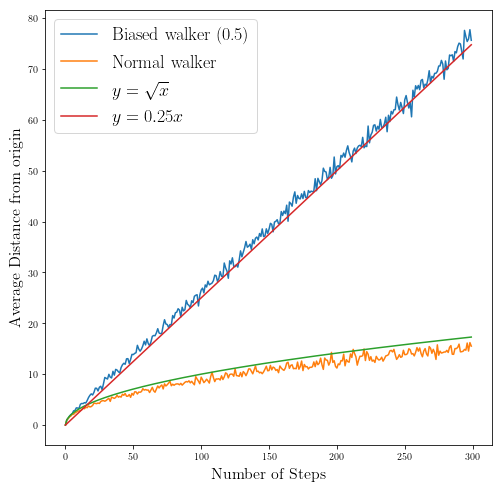

In [120]:
fig = plt.figure(figsize=(8,8))
slope=0.25

plt.plot(range(number_of_steps_range), distances_biased, label="Biased walker (0.5)")
plt.plot(range(number_of_steps_range), distances, label="Normal walker")
plt.plot(range(number_of_steps_range), np.sqrt(range(number_of_steps_range)), label="$y=\sqrt{x}$")
plt.plot(range(number_of_steps_range), slope*np.array(range(number_of_steps_range)), label="$y={} x$".format(slope))

plt.xlabel(r"Number of Steps", size=16)
plt.ylabel(r"Average Distance from origin", size=16)
plt.legend(fontsize=18)

plt.show()

Which as you can see, when you add a bias to your random walk is going to make the average distance to scale with Number of steps instead of square root of the number of steps which is the case for normal walker. 

# Monte Carlo simulation for the roulette game: 

### Here is a picture of a roulette game: (for more info check out the [wikipedia](https://en.wikipedia.org/wiki/Roulette))

In this exercise, we are going to run some Monte Carlo simulations for the roulette game to see what is our average take out of the game. We are going to explore three different versions:
1. Fair Roulette
2. European Roulette
3. American Roulette


left: **American Roulette**  

right:**European Roulette**


![American Roulette](./notebook_images/american-roulette-wheel_0.jpg)  ![European Roulette](./notebook_images/6-4-European-Roulette.png)



First we arer going to build a game class that initialize the staring configuration as well having some methods we need such as `spin` and `bet_pocket`:

In [105]:
import random

class Fair_roulette:
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocket_odds = len(self.pockets) - 1
    
    def spin(self):
        self.ball = random.choice(self.pockets)
    
    def bet_pocket(self, pocket, money_amount):
        if str(pocket) == str(self.ball):
            return money_amount * self.pocket_odds
        else:
            return -money_amount
    
    def __str__(self):
        return "Fair Roulette"

This is the function that will play the roulette for us:

In [106]:
def play_roulette(game, number_of_spins, pocket, amount_bet):
    total_pocket = 0
    for i in range(number_of_spins):
        game.spin()
        total_pocket += game.bet_pocket(pocket, amount_bet)
    ratio=total_pocket/number_of_spins
    print(number_of_spins, " spins of the ", game)
    print("Expected return for ", pocket, "is ", str(100*ratio)+"% \n")
    return (ratio)

Let's do some simulation for the fair roulette:

In [123]:
our_game = Fair_roulette()
which_pocket_to_bet = 7
bet_amount = 1
list_of_spins = [10, 100, 1000, 10000, 100000, 10**6]

for spins_num in list_of_spins:
    for _ in range(2):
        play_roulette(our_game, spins_num, which_pocket_to_bet, bet_amount)
    
    

10  spins of the  Fair Roulette
Expected return for  7 is  620.0% 

10  spins of the  Fair Roulette
Expected return for  7 is  260.0% 

100  spins of the  Fair Roulette
Expected return for  7 is  -64.0% 

100  spins of the  Fair Roulette
Expected return for  7 is  -28.000000000000004% 

1000  spins of the  Fair Roulette
Expected return for  7 is  -2.8000000000000003% 

1000  spins of the  Fair Roulette
Expected return for  7 is  8.0% 

10000  spins of the  Fair Roulette
Expected return for  7 is  -10.72% 

10000  spins of the  Fair Roulette
Expected return for  7 is  1.52% 

100000  spins of the  Fair Roulette
Expected return for  7 is  2.42% 

100000  spins of the  Fair Roulette
Expected return for  7 is  0.5479999999999999% 

1000000  spins of the  Fair Roulette
Expected return for  7 is  0.5228% 

1000000  spins of the  Fair Roulette
Expected return for  7 is  1.3004% 



As you can see the variations for the money we take are huge when the number of spins is low, but when we get to  $n>10^5$ simulations our results are relatively close to zero which is good news since it means our game is fair.

For making the European version of the game which has an extra 0 in it, we are going to make some sub-class of the regular roulette class. And the American game has the new number 00 on top of the Europian version, so we make it as a sub-class of the European game.


In [56]:
class European_roulette(Fair_roulette):
    def __init__(self):
        Fair_roulette.__init__(self)
        self.pockets.append("0")
    
    def __str__(self):
        return "European Roulette"
    
    
class American_roulette(European_roulette):
    def __init__(self):
        European_roulette.__init__(self)
        self.pockets.append("00")
        
    def __str__(self):
        return "American Roulette"

As you probably guessed we are adding to the number of possible places for the ball without changing the odds of the winning. We have 37-38 possible locations for the ball, but when we win, we are going to win 36 dollars per each dollar.

Let's rerun our simulations and see what is going to change to our average takeouts:

In [130]:
our_games = (Fair_roulette(), European_roulette(), American_roulette())
which_pocket_to_bet = 2
bet_amount = 1
list_of_spins = [10, 100, 10**6]

for game in our_games:
    for spins_num in list_of_spins:
        for _ in range(2):
            play_roulette(game, spins_num, which_pocket_to_bet, bet_amount)
    
    

10  spins of the  Fair Roulette
Expected return for  2 is  -100.0% 

10  spins of the  Fair Roulette
Expected return for  2 is  -100.0% 

100  spins of the  Fair Roulette
Expected return for  2 is  -28.000000000000004% 

100  spins of the  Fair Roulette
Expected return for  2 is  8.0% 

1000000  spins of the  Fair Roulette
Expected return for  2 is  -0.3664% 

1000000  spins of the  Fair Roulette
Expected return for  2 is  -0.6904% 

10  spins of the  European Roulette
Expected return for  2 is  -100.0% 

10  spins of the  European Roulette
Expected return for  2 is  -100.0% 

100  spins of the  European Roulette
Expected return for  2 is  8.0% 

100  spins of the  European Roulette
Expected return for  2 is  -28.000000000000004% 

1000000  spins of the  European Roulette
Expected return for  2 is  -2.4903999999999997% 

1000000  spins of the  European Roulette
Expected return for  2 is  -2.7567999999999997% 

10  spins of the  American Roulette
Expected return for  2 is  -100.0% 

10 

As you can see for a small number of spins, we still have vast variations between different runs for **all versions** of the game. But the story is different for the large numbers! In the European version you are losing by about 2-3 percent, and in the American version, you are losing 4-5 percent on average.

So now you know how a casino can make money out of this game since they are not interested in the average of the cash they win/lose in a small number of spins. Instead, they are making money in the long run. 

**The other exciting thing about the experiment is that if you decide to gamble with roulette for only a few spins you can get lucky several times since the variation of the expected value is significant, but don't plan to make money in this way since you are going to lose to casino in the long run!**